In [11]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using {device} device")

Using cuda device


In [2]:
!git clone https://github.com/facebookresearch/segment-anything-2.git

!cd segment-anything-2 && pip install -e .

  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=SAM_2-1.0-0.editable-cp310-cp310-linux_x86_64.whl size=13400 sha256=da8f822ef5e9defed930b930bb8c0a56c323daef4a993b9800c82f803c33b33f
  Stored in directory: /tmp/pip-ephem-wheel-cache-_0jxhxck/wheels/7d/af/fe/c05425a1fdc391329545b53111d5cabdfc241ee07cab053945
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=f03b5cf81cd5e25c22a0fa9262ec95603f8b01d1a98951c3a38f6acee891548a
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31529 sha256=df707d7264933b974d48e81b1a6f3192fdaf8b7b62d9453cbda6754658b47a34
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built SAM-2 antlr4-python3-runtime iopath


In [ ]:
!cd /content/segment-anything-2/checkpoints && ./download_ckpts.sh

In [4]:
%cd /content/segment-anything-2

/content/segment-anything-2


In [6]:
!pip install pydicom

In [5]:
import pydicom
import numpy as np
import os
import matplotlib.pyplot as plt
import os
import shutil
import pydicom
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
from glob import glob
import re
from matplotlib.gridspec import GridSpec

In [9]:
from google.colab import files
uploaded = files.upload()

Saving dicom.zip to dicom.zip


In [ ]:
!unzip ./dicom.zip -d ./

In [11]:
# Directory containing DICOM files
dicom_dir = './dicom'
# Directory to save the images
output_dir = './dicom_jpeg'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [12]:
# Function to save the image
def save_image(data, view, index):
    plt.imshow(data, cmap=plt.cm.gray)
    plt.axis('off')
    plt.savefig(f'{output_dir}/{view}/{index}.jpg', bbox_inches='tight', pad_inches=0)
    plt.close()

In [13]:
# Create subdirectories for each view
views = ['axial', 'coronal', 'sagittal']
for view in views:
    view_dir = os.path.join(output_dir, view)
    if not os.path.exists(view_dir):
        os.makedirs(view_dir)

In [14]:
dicom_files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if not f.endswith('.dcm')]

In [15]:
# Assuming all DICOM files are of the same size
slices = [pydicom.dcmread(f) for f in dicom_files]
slices.sort(key=lambda x: int(x.InstanceNumber))  # Sort slices by InstanceNumber

In [16]:
# Create a 3D numpy array
image_shape = list(slices[0].pixel_array.shape)
image_shape.append(len(slices))
image_3d = np.zeros(image_shape)

for i, s in enumerate(slices):
    image_3d[:, :, i] = s.pixel_array

In [17]:
# Save axial view (assuming the data is in the first dimension)
for i in range(image_3d.shape[2]):
    save_image(image_3d[:, :, i], 'axial', i)

# Save coronal view (assuming the data is in the second dimension)
for i in range(image_3d.shape[0]):
    save_image(np.rot90(image_3d[i, :, :]), 'coronal', i)

# Save sagittal view (assuming the data is in the third dimension)
for i in range(image_3d.shape[1]):
    save_image(np.rot90(image_3d[:, i, :]), 'sagittal', i)

print("Images saved successfully in respective directories.")

Images saved successfully in respective directories.


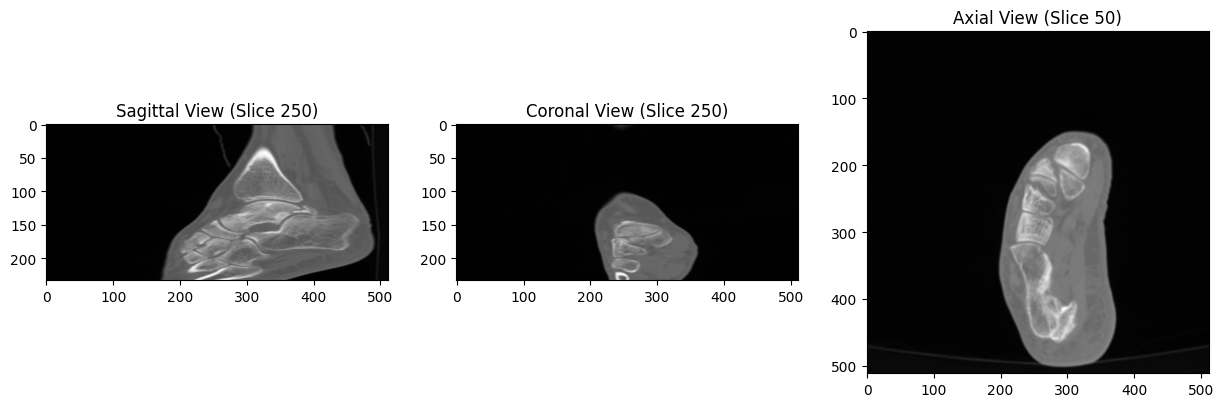

In [18]:
def plot_views(image_3d, sagittal_index=None, coronal_index=None, axial_index=None):
    # Default to the middle slice if no index is provided
    if sagittal_index is None:
        sagittal_index = image_3d.shape[0] // 2
    if coronal_index is None:
        coronal_index = image_3d.shape[1] // 2
    if axial_index is None:
        axial_index = image_3d.shape[2] // 2

    # Sagittal view (X-Z plane)
    fig = plt.figure(figsize=(15, 5))
    gs = GridSpec(1, 3, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(np.rot90(image_3d[:, sagittal_index, :]), cmap='gray')
    ax1.set_title(f'Sagittal View (Slice {sagittal_index})')

    # Coronal view (Y-Z plane)
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(np.rot90(image_3d[coronal_index ,:, :]), cmap='gray')
    ax2.set_title(f'Coronal View (Slice {coronal_index})')

    # Axial view (X-Y plane)
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.imshow(image_3d[:, :, axial_index], cmap='gray')
    ax3.set_title(f'Axial View (Slice {axial_index})')

    plt.show()

# Example usage
plot_views(image_3d, sagittal_index=250, coronal_index=250, axial_index=50)


In [19]:
def extract_slice_number(file):
    pattern = r'I(\d+)'
    match = re.search(pattern, file)
    if match:
        return int(match.group(1))
    else:
        return None

In [7]:
# Function to display an image
def display_image(image_path, title):
    img = mpimg.imread(image_path)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [66]:
 def display_images(image_path, view):
    # Create a figure and a set of subplots
    img = f'./dicom_jpeg/{view}/{image_path}.jpg'
    # Read the image data from the file paths
    img = mpimg.imread(img)
    # Display the images
    plt.imshow(img, cmap='gray')
    plt.title(f'{image_path} {view} View')
    plt.show()

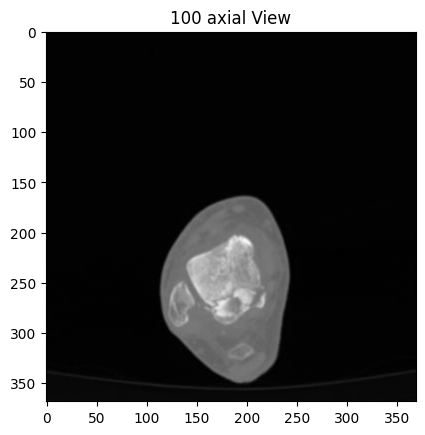

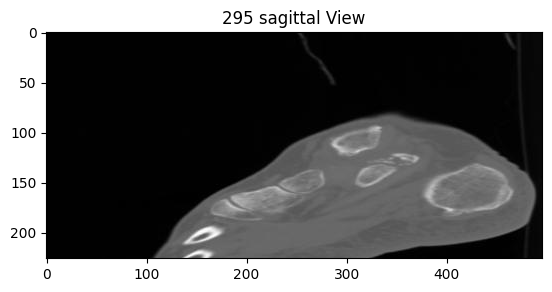

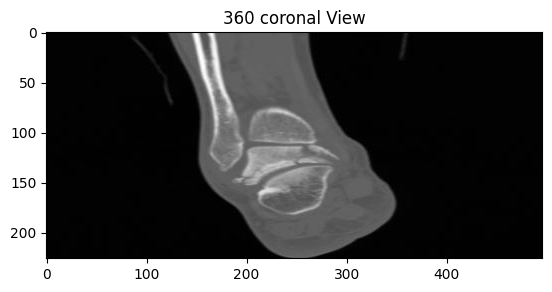

In [72]:
# Display the images
display_images('100', 'axial')
display_images('295', 'sagittal')
display_images('360', 'coronal')


Manually initialized Hydra with the correct config path

In [ ]:
import hydra
from hydra.core.global_hydra import GlobalHydra
from omegaconf import OmegaConf
import os

# Clear any existing Hydra config
GlobalHydra.instance().clear()

# Initialize Hydra with the correct config path
config_path = "./sam2/configs"
hydra.initialize(config_path=config_path)

# Load the config
cfg = hydra.compose(config_name="sam2.1/sam2.1_hiera_l")

print("Config loaded successfully")
print(OmegaConf.to_yaml(cfg))

# Now try to build the predictor
from sam2.build_sam import build_sam2_video_predictor

base_dir = "/content/segment-anything-2"
sam2_checkpoint = os.path.join(base_dir, "checkpoints", "sam2.1_hiera_large.pt")

try:
    predictor = build_sam2_video_predictor(config_file="sam2.1/sam2.1_hiera_l", ckpt_path=sam2_checkpoint, device=device)
    print("Predictor built successfully")
except Exception as e:
    print(f"Error building predictor: {str(e)}")
    import traceback
    traceback.print_exc()

There seems to be some config issues (related with path structure, perhaps) while running below code snippet on colab.

In [ ]:
# import torch
# from sam2.build_sam import build_sam2_video_predictor
# import os

# base_dir = "/content/segment-anything-2"
# sam2_checkpoint = os.path.join(base_dir, "checkpoints", "sam2.1_hiera_large.pt")
# model_cfg = "/content/segment-anything-2/sam2/configs/sam2.1/sam2.1_hiera_l.yaml"

# print(f"Config file path: {model_cfg}")
# print(f"Config file exists: {os.path.exists(model_cfg)}")

# try:
#     predictor = build_sam2_video_predictor(config_file=model_cfg, ckpt_path=sam2_checkpoint, device='cuda')
#     print("Predictor built successfully")
# except Exception as e:
#     print(f"Error building predictor: {str(e)}")
#     import traceback
#     traceback.print_exc()

In [ ]:
# import os
# import cv2

In [13]:
inference_state = predictor.init_state(video_path='./dicom_jpeg/sagittal')

frame loading (JPEG): 100%|██████████| 512/512 [00:14<00:00, 34.57it/s]


In [ ]:
# predictor.reset_state(inference_state)

In [14]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

In [15]:
sagital_dir = './dicom_jpeg/sagittal'

In [16]:
frame_names = [
    p for p in os.listdir(sagital_dir)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]
frame_names.sort(key=lambda p: int(os.path.splitext(p)[0]))

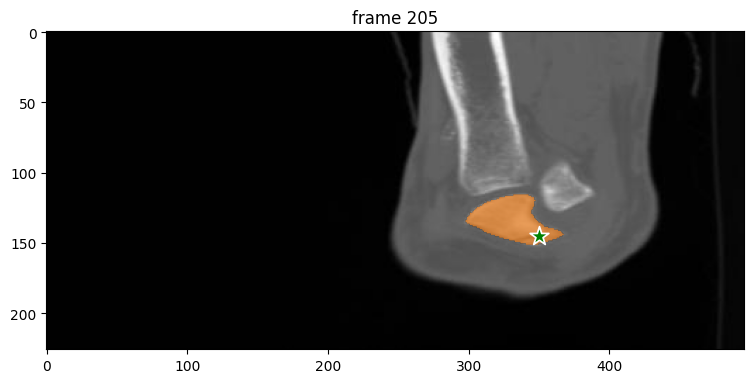

In [17]:
ann_frame_idx = 205  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integers)

# Let's add a positive click at (x, y) = (210, 350) to get started
points = np.array([[350, 145]], dtype=np.float32)
# for labels, `1` means positive click and `0` means negative click
labels = np.array([1], np.int32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
)

# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(sagital_dir, frame_names[ann_frame_idx])))
show_points(points, labels, plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

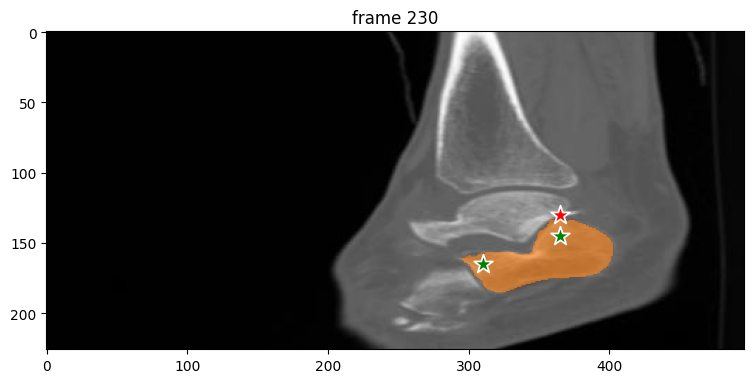

In [60]:
ann_frame_idx = 230  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integers)

# Let's add a 2nd positive click at (x, y) = (250, 220) to refine the mask
# sending all clicks (and their labels) to `add_new_points_or_box`
points = np.array([[365, 145], [310, 165], [365, 130]], dtype=np.float32)
# for labels, `1` means positive click and `0` means negative click
labels = np.array([1, 1, 0], np.int32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
)

# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(sagital_dir, frame_names[ann_frame_idx])))
show_points(points, labels, plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

In [61]:
# run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
    video_segments[out_frame_idx] = {
        out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
        for i, out_obj_id in enumerate(out_obj_ids)
    }

propagate in video: 100%|██████████| 307/307 [04:10<00:00,  1.23it/s]


In [63]:
print("Available frame indices:", sorted(video_segments.keys()))
print("Total frames processed:", len(video_segments))
print("First frame index:", min(video_segments.keys()))
print("Last frame index:", max(video_segments.keys()))

Available frame indices: [205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399,

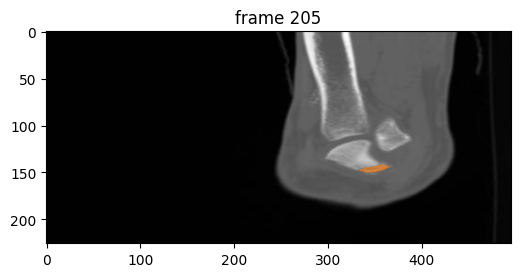

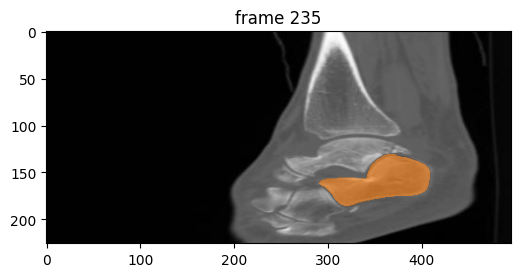

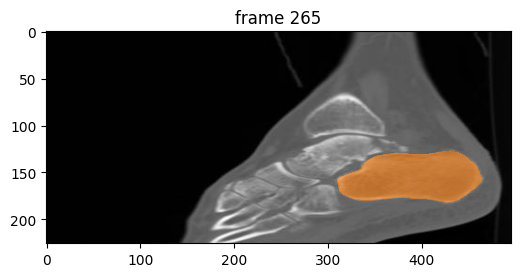

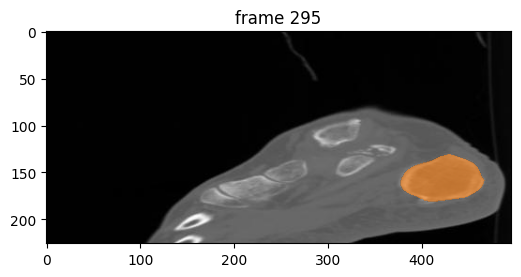

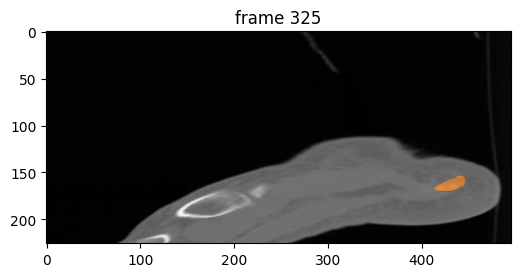

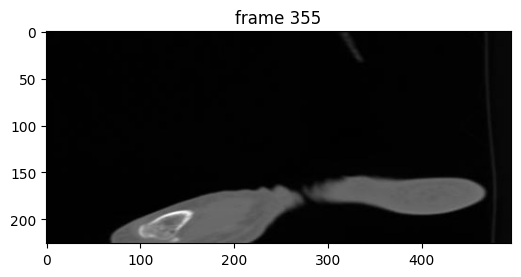

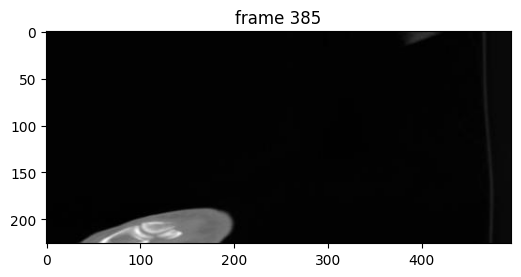

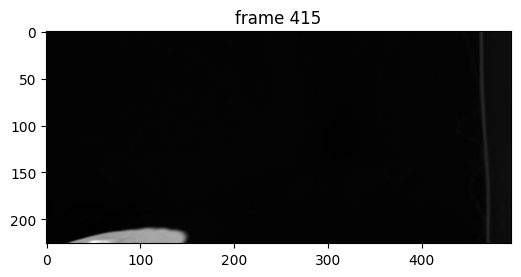

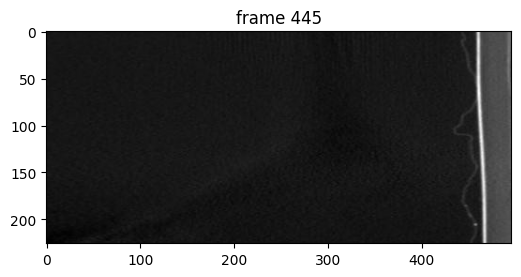

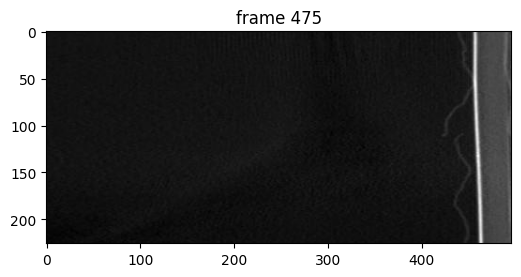

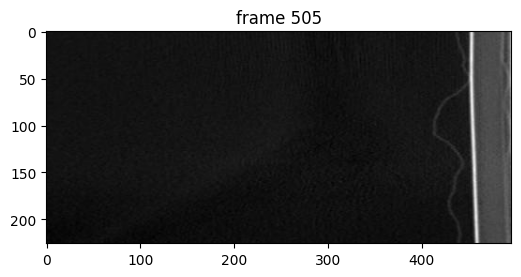

In [64]:
# render the segmentation results every few frames
vis_frame_stride = 30
plt.close("all")

# Get the range of frame indices actually present in video_segments
min_frame = min(video_segments.keys())
max_frame = max(video_segments.keys())

for out_frame_idx in range(min_frame, max_frame + 1, vis_frame_stride):
    if out_frame_idx in video_segments:
        plt.figure(figsize=(6, 4))
        plt.title(f"frame {out_frame_idx}")
        plt.imshow(Image.open(os.path.join(sagital_dir, frame_names[out_frame_idx])))
        for out_obj_id, out_mask in video_segments[out_frame_idx].items():
            show_mask(out_mask, plt.gca(), obj_id=out_obj_id)
        plt.show()
    else:
        print(f"Frame {out_frame_idx} not found in video_segments")